In [28]:
!pip install perceval-quandela

In [29]:
from perceval.components.unitary_components import PS, BS, PERM
import perceval as pcvl
import numpy as np
import random
import matplotlib.pyplot as plt

In [30]:
# define our generator class
class Generator:
 def __init__(self, n):
   self.n = n


 def create(self):
   qc = pcvl.Circuit(self.n, name = "Generator")
   qc.add(1, PS(phi=pcvl.P('gen_phi_1')))
   qc.add(2, PS(phi=pcvl.P('gen_phi_2')))
   qc.add(3, PS(phi=pcvl.P('gen_phi_3')))


   # mzi
   qc.add(0, BS(theta=pcvl.P('gen_theta_1'))).add(0, PS(phi=pcvl.P('gen_phi_4'))).add(0, BS(theta=pcvl.P('gen_theta_2')))
   qc.add(2, BS(theta=pcvl.P('gen_theta_3'))).add(2, PS(phi=pcvl.P('gen_phi_5'))).add(2, BS(theta=pcvl.P('gen_theta_4')))


   qc.add(1, PS(phi=pcvl.P('gen_phi_6')))
   qc.add(1, BS(theta=pcvl.P('gen_theta_5'))).add(1, PS(phi=pcvl.P('gen_phi_7'))).add(1, BS(theta=pcvl.P('gen_theta_6')))


   qc.add(0, BS(theta=pcvl.P('gen_theta_7'))).add(0, PS(phi=pcvl.P('gen_phi_8'))).add(0, BS(theta=pcvl.P('gen_theta_8')))
   qc.add(2, BS(theta=pcvl.P('gen_theta_9'))).add(2, PS(phi=pcvl.P('gen_phi_9'))).add(2, BS(theta=pcvl.P('gen_theta_10')))


   qc.add(0, PS(phi=pcvl.P('gen_phi_10')))
   qc.add(1, PS(phi=pcvl.P('gen_phi_11')))
   qc.add(2, PS(phi=pcvl.P('gen_phi_12')))


   # ----
   qc.add(1+4, PS(phi=pcvl.P('gen_phi_13')))
   qc.add(2+4, PS(phi=pcvl.P('gen_phi_14')))
   qc.add(3+4, PS(phi=pcvl.P('gen_phi_15')))


   # pseudo-mzi
   qc.add(0+4, BS(theta=pcvl.P('gen_theta_11'))).add(0+4, PS(phi=pcvl.P('gen_phi_16'))).add(0+4, BS(theta=pcvl.P('gen_theta_12')))
   qc.add(2+4, BS(theta=pcvl.P('gen_theta_13'))).add(2+4, PS(phi=pcvl.P('gen_phi_17'))).add(2+4, BS(theta=pcvl.P('gen_theta_14')))


   qc.add(1+4, PS(phi=pcvl.P('gen_phi_18')))
   qc.add(1+4, BS(theta=pcvl.P('gen_theta_15'))).add(1+4, PS(phi=pcvl.P('gen_phi_19'))).add(1+4, BS(theta=pcvl.P('gen_theta_16')))


   qc.add(0+4, BS(theta=pcvl.P('gen_theta_17'))).add(0+4, PS(phi=pcvl.P('gen_phi_20'))).add(0+4, BS(theta=pcvl.P('gen_theta_18')))
   qc.add(2+4, BS(theta=pcvl.P('gen_theta_19'))).add(2+4, PS(phi=pcvl.P('gen_phi_21'))).add(2+4, BS(theta=pcvl.P('gen_theta_20')))


   qc.add(0+4, PS(phi=pcvl.P('gen_phi_22')))
   qc.add(1+4, PS(phi=pcvl.P('gen_phi_23')))
   qc.add(2+4, PS(phi=pcvl.P('gen_phi_24')))


   return qc

In [31]:
# define our discriminator class
class Discriminator:
 def __init__(self, n):
   self.n = n


 def create(self):
   qc = pcvl.Circuit(self.n, name = "Discriminator")
   qc.add(0, PS(phi=pcvl.P('dis_phi_1')))
   qc.add(1, PS(phi=pcvl.P('dis_phi_2')))
   qc.add(2, PS(phi=pcvl.P('dis_phi_3')))


   # mzi
   qc.add(0, BS(theta=pcvl.P('dis_theta_1'))).add(0, PS(phi=pcvl.P('dis_phi_4'))).add(0, BS(theta=pcvl.P('dis_theta_2')))
   qc.add(2, BS(theta=pcvl.P('dis_theta_3'))).add(2, PS(phi=pcvl.P('dis_phi_5'))).add(2, BS(theta=pcvl.P('dis_theta_4')))


   qc.add(1, BS(theta=pcvl.P('dis_theta_5'))).add(1, PS(phi=pcvl.P('dis_phi_6'))).add(1, BS(theta=pcvl.P('dis_theta_6')))

   # ----


   qc.add(0+4, PS(phi=pcvl.P('dis_phi_7')))
   qc.add(1+4, PS(phi=pcvl.P('dis_phi_8')))
   qc.add(2+4, PS(phi=pcvl.P('dis_phi_9')))


   # mzi
   qc.add(0+4, BS(theta=pcvl.P('dis_theta_7'))).add(0+4, PS(phi=pcvl.P('dis_phi_10'))).add(0+4, BS(theta=pcvl.P('dis_theta_8')))
   qc.add(2+4, BS(theta=pcvl.P('dis_theta_9'))).add(2+4, PS(phi=pcvl.P('dis_phi_11'))).add(2+4, BS(theta=pcvl.P('dis_theta_10')))


   qc.add(1+4, BS(theta=pcvl.P('dis_theta_11'))).add(1+4, PS(phi=pcvl.P('dis_phi_12'))).add(1+4, BS(theta=pcvl.P('dis_theta_12')))


   return qc

In [32]:
gen = Generator(8).create()
dis = Discriminator(8).create()

In [33]:
genparams={}
for i in range(1,25):
  genparams[f"gen_phi_{i}"]=random.uniform(0, 2*np.pi)

for i in range(1,21):
  genparams[f"gen_theta_{i}"]=np.pi/2;


disparams={}
for i in range(1,13):
  disparams[f"dis_phi_{i}"]=random.uniform(0, 2*np.pi)

for i in range(1,13):
  disparams[f"dis_theta_{i}"]=np.pi/2;


In [34]:
gen.assign(genparams)
dis.assign(disparams)
chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)

In [35]:
# we define our initial_paper_state
initial_paper_state = pcvl.utils.StateVector(pcvl.BasicState('|1,0,0,0,1,0,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,1,0,0,0,1,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,1,0,0,0,1,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,0,1,0,0,0,1>'))
true_paper_state = pcvl.utils.StateVector(pcvl.BasicState('|1,0,0,0,0,1,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,1,0,0,0,0,1,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,1,0,0,0,0,1>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,0,1,1,0,0,0>'))

In [36]:
#We initialize one processor with only the discriminator and input state the true state
processor1 = pcvl.Processor("SLOS", dis)
processor1.with_input(true_paper_state)
sampler = pcvl.algorithm.Sampler(processor1)
probs_true = sampler.probs()

true_vec = np.array(list(probs_true['results'].values()))

In [37]:
#We initialize another processor with the generator and the discriminant and input state the hard coded maximally input state

processor2 = pcvl.Processor("SLOS", chip)
processor2.with_input(initial_paper_state)
sampler = pcvl.algorithm.Sampler(processor2)

init_vec = np.array(list(sampler.probs()['results'].values()))

In [38]:
#We define the loss function as the absolute value of 1- dotproduct(true_vec,init_vec) where true_vec is the vector mapped by the discriminator when the true state
#is passed to it, and init_vec is the vector mapped by the discriminator when the generator's output is passed into it.

def loss(true_vec, init_vec):
  dot_product = np.vdot(true_vec, init_vec)
  print(np.abs(1-dot_product))
  return np.abs(1-dot_product)

In [39]:
import random



#Optimize by tweaking the init_vec
def gen_optimize(init_vec, genparams):
  h = 0.01
  for i in range(1,25):
    genparams_stored = genparams.copy();


    genparams[f'gen_phi_{i}'] += h;
    gen.assign(genparams)
    chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)
    processor2 = pcvl.Processor("SLOS", chip)
    processor2.with_input(initial_paper_state)
    sampler = pcvl.algorithm.Sampler(processor2)

    init_vec_perturb = np.array(list(sampler.probs()['results'].values()))

    dLoss = loss(true_vec, init_vec_perturb) - loss(true_vec, init_vec)
    if (dLoss < 0):
      init_vec = init_vec_perturb;

    elif(dLoss > 0):
      genparams[f'gen_phi_{i}'] -= h;
      gen.assign(genparams)
      chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)
      processor2 = pcvl.Processor("SLOS", chip)
      processor2.with_input(initial_paper_state)
      sampler = pcvl.algorithm.Sampler(processor2)

      init_vec = np.array(list(sampler.probs()['results'].values()))
    elif(dLoss == 0):
      gen.assign(genparams_stored)
      genparams = genparams_stored;

     #print(dLoss);





#Optimize by tweaking the true_vec and init_vec
def disc_optimize(true_vec, init_vec, disparams):
  h=0.01
  for i in range(1,13):
    disparams_stored = disparams.copy()

    disparams[f'dis_phi_{i}'] += h;
    dis.assign(disparams)
    chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)
    processor2 = pcvl.Processor("SLOS", chip)
    processor2.with_input(initial_paper_state)
    sampler = pcvl.algorithm.Sampler(processor2)
    init_vec_perturb = np.array(list(sampler.probs()['results'].values()))

    processor1 = pcvl.Processor("SLOS", dis)
    processor1.with_input(true_paper_state)
    sampler = pcvl.algorithm.Sampler(processor1)
    true_vec_perturb = np.array(list(sampler.probs()['results'].values()))


    dLoss = loss(true_vec, init_vec_perturb) - loss(true_vec, init_vec)
    if (dLoss > 0):
      init_vec = init_vec_perturb;
      true_vec = true_vec_perturb;

    elif(dLoss < 0):
      disparams[f'dis_phi_{i}'] -= h;
      dis.assign(disparams)
      chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)
      processor2 = pcvl.Processor("SLOS", chip)
      processor2.with_input(initial_paper_state)
      #sampler = pcvl.algorithm.Sampler(processor2)

      init_vec = np.array(list(sampler.probs()['results'].values()))
    elif(dLoss == 0):
      dis.assign(disparams_stored)
      disparams = disparams_stored;

    #print(dLoss)



In [40]:
epochs = 1000
#alternative games between the generator and discriminator

for i in range(1,epochs):
  if(i%2 == 0):
    gen_optimize(init_vec, genparams);

  else:
    disc_optimize(true_vec, init_vec, disparams);
    pass;


Streaming output truncated to the last 5000 lines.
0.8823713215587617
0.8823776877801645
0.8824005827969472
0.8823713215587617
0.8823565040302038
0.8823713215587617
0.8823587370834103
0.8823565040302038
0.8823553633507102
0.8823565040302038
0.8823562644142348
0.8823553633507102
0.8823535100620487
0.8823553633507102
0.8823538996912585
0.919720694814482
0.8823535704641315
0.8940861688860315
0.8823532556158049
0.8940861688860315
0.882345960155991
0.8940861688860315
0.8823534008440655
0.8940861688860315
0.8824044536797986
0.8940861688860315
0.8823548024741696
0.8940861688860315
0.882354413402165
0.8940861688860315
0.8823517165095098
0.8940861688860315
0.8823355045316189
0.8940861688860315
0.8823538431418759
0.8940861688860315
0.882357363314613
0.8940861688860315
0.8823636595067142
0.919720694814482
0.8823634291686442
0.8823636595067142
0.8823634662880335
0.8823634291686442
0.8823612033804401
0.8823634291686442
0.8823609515058493
0.8823612033804401
0.8823609049585288
0.8823609515058493
0.88

KeyboardInterrupt: 

{
  |0,0,0,1,0,1,0,0>: 1
  |0,0,1,0,0,0,0,1>: 53
  |0,0,1,0,0,1,0,0>: 2413
  |1,0,0,0,0,1,0,0>: 1
  |0,1,0,0,0,1,0,0>: 41
  |1,0,0,0,0,0,0,1>: 41
  |0,0,0,1,1,0,0,0>: 23
  |0,0,0,1,0,0,0,1>: 416
  |1,0,0,0,1,0,0,0>: 2432
  |0,1,0,0,1,0,0,0>: 51
  |1,0,0,0,0,0,1,0>: 19
  |0,0,0,1,0,0,1,0>: 2139
  |0,0,1,0,0,0,1,0>: 6
  |0,1,0,0,0,0,0,1>: 1994
  |0,1,0,0,0,0,1,0>: 370
}
['|0,0,0,1,0,1,0,0>', '|0,0,1,0,0,0,0,1>', '|0,0,1,0,0,1,0,0>', '|1,0,0,0,0,1,0,0>', '|0,1,0,0,0,1,0,0>', '|1,0,0,0,0,0,0,1>', '|0,0,0,1,1,0,0,0>', '|0,0,0,1,0,0,0,1>', '|1,0,0,0,1,0,0,0>', '|0,1,0,0,1,0,0,0>', '|1,0,0,0,0,0,1,0>', '|0,0,0,1,0,0,1,0>', '|0,0,1,0,0,0,1,0>', '|0,1,0,0,0,0,0,1>', '|0,1,0,0,0,0,1,0>']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '|0,0,0,1,0,1,0,0>'),
  Text(1, 0, '|0,0,1,0,0,0,0,1>'),
  Text(2, 0, '|0,0,1,0,0,1,0,0>'),
  Text(3, 0, '|1,0,0,0,0,1,0,0>'),
  Text(4, 0, '|0,1,0,0,0,1,0,0>'),
  Text(5, 0, '|1,0,0,0,0,0,0,1>'),
  Text(6, 0, '|0,0,0,1,1,0,0,0>'),
  Text(7, 0, '|0,0,0,1,0,0,0,1>'),
  Text(8, 0, '|1,0,0,0,1,0,0,0>'),
  Text(9, 0, '|0,1,0,0,1,0,0,0>'),
  Text(10, 0, '|1,0,0,0,0,0,1,0>'),
  Text(11, 0, '|0,0,0,1,0,0,1,0>'),
  Text(12, 0, '|0,0,1,0,0,0,1,0>'),
  Text(13, 0, '|0,1,0,0,0,0,0,1>'),
  Text(14, 0, '|0,1,0,0,0,0,1,0>')])

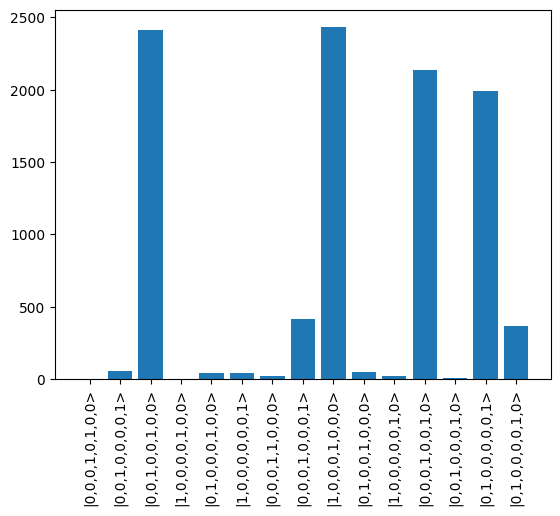

In [41]:
sampler = pcvl.algorithm.Sampler(processor1)
sampler = pcvl.algorithm.Sampler(processor2)
sample_count=sampler.sample_count(10000)
print(sample_count['results'])
l = [str(element) for element in (list(sample_count['results'].keys()))]
print(l)
plt.bar(l,sample_count['results'].values())
plt.xticks(rotation=90)

In [50]:
def fidelity():
  sum = 0
  sampler = pcvl.algorithm.Sampler(processor2)
  pdf = np.array(list(probs_true['results'].values()))

  for i in range(len(pdf)):
    sum += pdf[i] * pdf [i]


  #print(np.sqrt(sum))
  return np.sqrt(sum)

fidelity = fidelity();
print("Fidelity of simulation: " + str(fidelity))

Fidelity of simulation: 0.3700910121336143
